In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline
import os
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.colors as cl 
from matplotlib import rc
import matplotlib.style as style 
import math
import xarray as xr
import warnings
import plotly.graph_objects as go
import plotly.express as px


import pandas as pd
warnings.filterwarnings('ignore')
style.available
style.use('seaborn-whitegrid')

####### Plot settings #######
nice_fonts = {
    "legend.frameon": True, 
    "legend.fancybox": True, 
    "legend.facecolor": "white", 
    "axes.edgecolor": "0.8",
    "axes.linewidth": 0.6,
    "grid.linewidth":0.3,
    # Use LaTeX to write all text
    "text.usetex": False,
    "font.family": "serif",
    # Use 10pt font in plots, to match 10pt font in document
    "axes.labelsize": 12,
    "font.size": 12,
    # Make the legend/label fonts a little smaller
    "legend.fontsize": 10,
    "xtick.labelsize": 10,
    "ytick.labelsize": 10,
}
plt.rcParams.update(nice_fonts)



# Plot Evapotranspiration

In [10]:
#os.chdir(project_path+'/output/OliveTree/1')
os.listdir()

['2_Output_GEOSPACE1DOlive_SoluteTransport_0512_04.ipynb',
 'Pressure_cavalese_1718.csv',
 '.DS_Store',
 'Wind_1.csv',
 'LAI_cavalese_1718.csv',
 'Soil_moisture_cavalese_1718.csv',
 'ShortwaveDiffuse_1.csv',
 'ShortwaveDirect_1.csv',
 'GHF_cavalese_1718.csv',
 'airT_1.csv',
 'Prospero.sim',
 'Moisture_1.csv',
 'RH_1.csv',
 '__pycache__',
 'RH1hmean_cavalese_1718.csv',
 'ShortwaveDiffuse_cavalese_1718.csv',
 'wind_cavalese_1718.csv',
 'ShortwaveDirect_cavalese_1718.csv',
 'LAI_1.csv',
 '.ipynb_checkpoints',
 'LongDownwelling_1.csv',
 'airT_cavalese_1718.csv',
 'timeseries_writer.py',
 'Net_cavalese_1718.csv',
 'Data_SolarRadiation_mean_hourly.ipynb',
 'Net_1.csv',
 'LongDownwelling_cavalese_1718.csv',
 'GHF_1.csv',
 'Pres_1.csv']

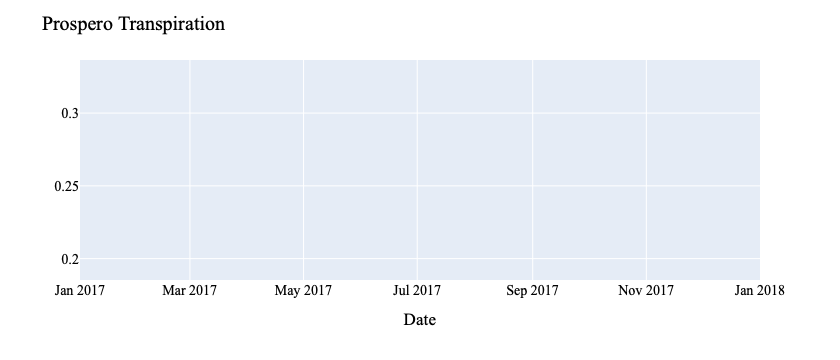

In [11]:
df = pd.read_csv('Moisture_1.csv',skiprows=6, sep=',', parse_dates=[0], na_values=-9999,usecols=[1,2])
df.columns = ['Datetime','Prospero']
fig = px.line(df, x='Datetime', y='Prospero')
fig.update_layout(
        title='Prospero Transpiration',
        xaxis_title="Date",
        font_family="Times New Roman",
        font_color="Black",
        title_font_family="Times New Roman",
        title_font_color="Black",
        yaxis_title="$Transpiration -[mm]$",
        font=dict(size=14))
fig.show()

In [ ]:
df2 = pd.read_csv('ET.csv',skiprows=6, sep=',', parse_dates=[0], na_values=-9999,usecols=[1,2])
df2.columns = ['Datetime','SapFlow']
fig = px.line(df2, x='Datetime', y='SapFlow')
fig.update_layout(
        title='SapFlow Transpiration',
        xaxis_title="Date",
        font_family="Times New Roman",
        font_color="Black",
        title_font_family="Times New Roman",
        title_font_color="Black",
        yaxis_title="$Transpiration -[mm]$",
        font=dict(size=14))
fig.show()

In [ ]:
fig = px.line()
fig.add_trace(go.Scatter(x=df['Datetime'], y=df['Prospero'], mode='lines', name='T-Prospero [mm]'))
fig.add_trace(go.Scatter(x=df['Datetime'], y=df2['SapFlow'], mode='lines', name='SapFlow [mm]'))
fig.update_layout(
        title='Compare Transpiration',
        xaxis_title="Date",
        font_family="Times New Roman",
        font_color="Black",
        title_font_family="Times New Roman",
        title_font_color="Black",
        yaxis_title="$Transpiration -[mm]$",
        font=dict(size=14))
fig.show()

In [15]:
os.chdir(project_path+'/data/OliveTree/1')

In [16]:
df = pd.read_csv('ISO3.csv',skiprows=6,parse_dates=[1])
df = df.drop(['Format'],axis=1) 
df.columns = ['Datetime','c03']

In [17]:
df2 = pd.read_csv('ISO10.csv',skiprows=6,parse_dates=[1])
df2 = df2.drop(['Format'],axis=1) 
df2.columns = ['Datetime','c10']

In [18]:
df3 = pd.read_csv('ISO20.csv',skiprows=6,parse_dates=[1])
df3 = df3.drop(['Format'],axis=1) 
df3.columns = ['Datetime','c20']

In [19]:
df4 = pd.read_csv('ISO35.csv',skiprows=6,parse_dates=[1])
df4 = df4.drop(['Format'],axis=1) 
df4.columns = ['Datetime','c35']

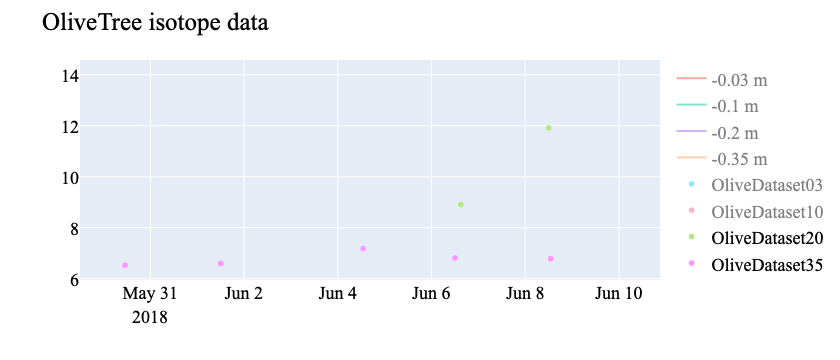

In [20]:
fig = px.line()
for i in range (0,len(myDepth)):
    fig.add_trace(go.Scatter(x=ds.time.values[:], y=ds.concentrations.sel(depth=myDepth[i], method='nearest', time=ds.time.values[:]) , mode='lines', name=str(myDepth[i])+' m'))

fig.add_trace(go.Scatter(x=df['Datetime'], y=df['c03'], mode='markers', name='OliveDataset03'))
fig.add_trace(go.Scatter(x=df2['Datetime'],y=df2['c10'], mode='markers', name='OliveDataset10'))
fig.add_trace(go.Scatter(x=df3['Datetime'],y=df3['c20'], mode='markers', name='OliveDataset20'))
fig.add_trace(go.Scatter(x=df4['Datetime'],y=df4['c35'], mode='markers', name='OliveDataset35'))

fig.update_layout(
        title='OliveTree isotope data',
        #xaxis_title="Date"
        font_family="Times New Roman",
        font_color="Black",
        title_font_family="Times New Roman",
        title_font_color="Black",
        #yaxis_title="$Leakage -[mm h^{-1}]$",
        #legend_title="Date",
        font=dict(size=18))
fig.show()

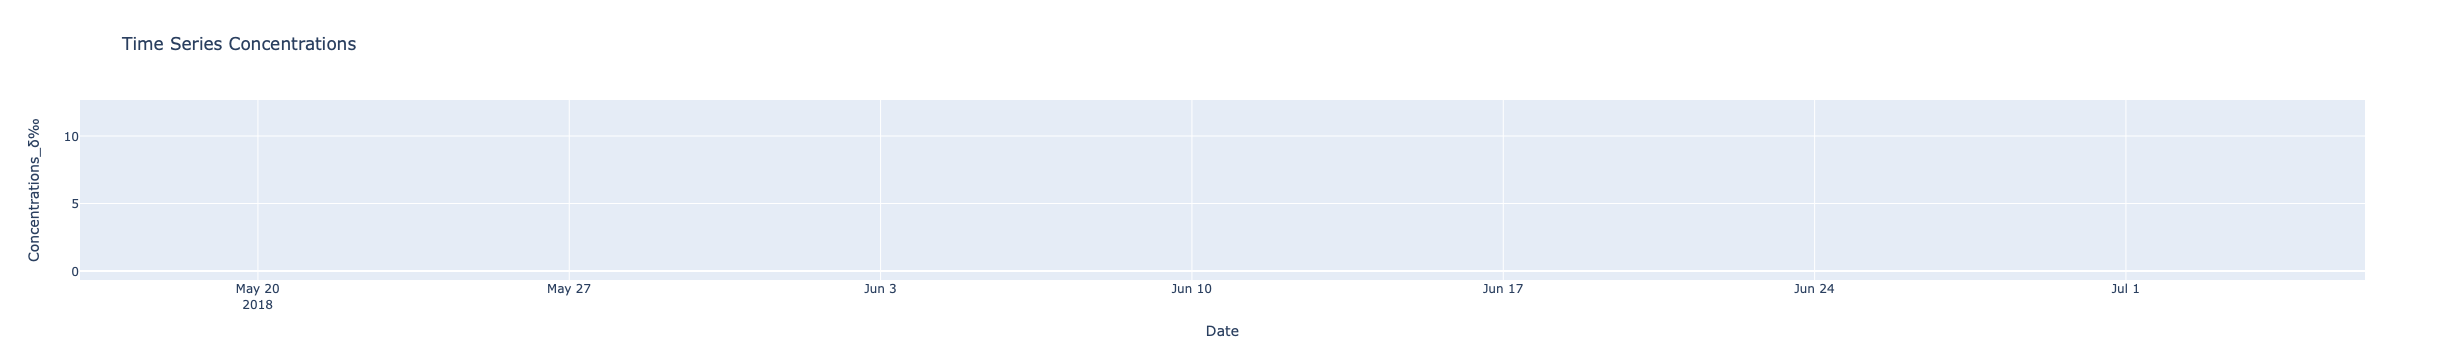

In [21]:
kl = pd.read_csv('O18.csv' ,skiprows=6,parse_dates=[1])
kl = kl.drop(['Format'],axis=1) 
kl.columns.values[0] = 'Date'
kl.columns.values[1] = 'Concentrations_δ‰' 
fig = px.line(kl, x='Date', y='Concentrations_δ‰', title='Time Series Concentrations')
fig.show()

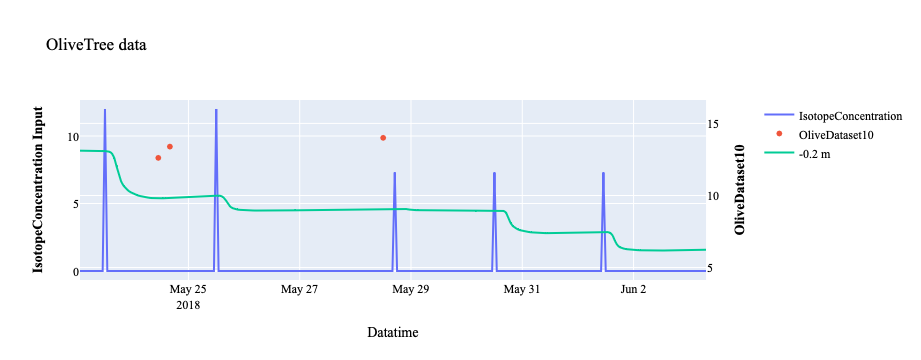

In [23]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Create figure with secondary y-axis
fig = make_subplots(specs=[[{"secondary_y": True}]])

# Add traces
fig.add_trace(
    go.Scatter(x=kl.Date.values, y=kl['Concentrations_δ‰'], name="IsotopeConcentration"),
    secondary_y=False,
)

fig.add_trace(
    go.Scatter(x=df2.Datetime.values, y=df3['c20'],mode='markers', name="OliveDataset10"),
    secondary_y=True,
)

fig.add_trace(
    go.Scatter(x=ds.time.values[:], y=ds.concentrations.sel(depth=myDepth[2], method='nearest', time=ds.time.values[:]) , mode='lines', name=str(myDepth[2])+' m'),
    secondary_y=True,
)
#fig.add_trace(go.Scatter(x=df2['Datetime'],y=df2['c10'], mode='markers', name='OliveDataset10'))

# Set x-axis title
fig.update_xaxes(title_text="Datatime")

# Set y-axes titles
fig.update_yaxes(title_text="<b>IsotopeConcentration Input</b>", secondary_y=False)
fig.update_yaxes(title_text="<b>OliveDataset10</b>", secondary_y=True)
fig.update_layout(
        title='OliveTree data',
        font_family="Times New Roman",
        font_color="Black",
        title_font_family="Times New Roman",
        title_font_color="Black",
        font=dict(size=12))
fig.show()